In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Weak Scaling
Random

In [3]:
tkrand = th.Thicket.from_caliperreader(glob("CALI_FILES_MPI/*-s1.cali"))
tkrand.dataframe = tkrand.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"

In [4]:
gbrand = tkrand.groupby("InputSize")

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b1811625e50>, 262144: <thicket.thicket.Thicket object at 0x2b1811946d60>, 1048576: <thicket.thicket.Thicket object at 0x2b1811941df0>}


In [5]:
ctkrand = th.Thicket.concat_thickets(
    thickets=list(gbrand.values()),
    headers=list(gbrand.keys()),
    axis="columns",
    metadata_key="num_procs"
)


In [6]:
ctkrand.dataframe

65536  \
                                                             Avg time/rank   
node                                               num_procs                 
{'name': 'main_function', 'type': 'function'}      2             12.826238   
                                                   4             11.324937   
                                                   8             10.369629   
                                                   16            12.056930   
                                                   32            17.266388   
{'name': 'comm', 'type': 'function'}               2             11.861925   
                                                   4             10.090361   
                                                   8              8.543706   
                                                   16             8.457471   
                                                   32            10.162419   
{'name': 'comm_large', 'type': 'function'}         2             11.861895   
                                                   4             10.090342   
                                                   8              8.543690   
                                                   16             8.457456   
                                                   32            10.162406   
{'name': 'MPI_gather', 'type': 'function'}         2              0.008163   
                                                   4              0.350664   
                                                   8              0.094009   
                                                   16             0.025872   
                                                   32             0.013926   
{'name': 'MPI_scatter', 'type': 'function'}        2              0.271450   
                                                   4              0.558452   
                                                   8              0.977149   
                                                   16             1.762274   
                                                   32             3.199503   
{'name': 'MPI_sendrecv_replace', 'type': 'funct... 2              0.002721   
                                                   4              0.710768   
                                                   8              0.630934   
                                                   16             0.817578   
                                                   32             2.153084   
{'name': 'comp_large', 'type': 'function'}         2             11.579470   
                                                   4              8.470313   
                                                   8              6.841361   
                                                   16             5.851272   
                                                   32             4.785435   
{'name': 'correct_check', 'type': 'function'}      2              0.000123   
                                                   4              0.000085   
                                                   8              0.000056   
                                                   16             0.000045   
                                                   32             0.000045   
{'name': 'data_initialization', 'type': 'functi... 2              0.001620   
                                                   4              0.001616   
                                                   8              0.001607   
                                                   16             0.001607   
                                                   32             0.003619   

                                                                    262144  \
                                                             Avg time/rank   
node                                               num_procs                 
{'name': 'main_function', 'type': 'function'}      2            190.963493   
            

In [7]:
ctkrand.dataframe = ctkrand.dataframe.reset_index().drop(("node"), axis=1)
ctkrand.dataframe = ctkrand.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

<ipython-input-7-3c3f415ea473>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctkrand.dataframe = ctkrand.dataframe.reset_index().drop(("node"), axis=1)


In [8]:
ctkrand.dataframe

65536        262144       1048576
                               Avg time/rank Avg time/rank Avg time/rank
name                 num_procs                                          
main_function        2             12.826238    190.963493   3006.791741
                     4             11.324937    159.167921   2492.951389
                     8             10.369629    129.974041   1996.615531
                     16            12.056930    117.554374   1741.694838
                     32            17.266388    121.829831   1631.801875
comm                 2             11.861925    188.467406   2997.952792
                     4             10.090361    156.760258   2486.109776
                     8              8.543706    127.211466   1989.980475
                     16             8.457471    113.368436   1734.286556
                     32            10.162419    111.628851   1620.882678
comm_large           2             11.861895    188.467377   2997.952747
                     4             10.090342    156.760236   2486.109743
                     8              8.543690    127.211446   1989.980453
                     16             8.457456    113.368418   1734.286536
                     32            10.162406    111.628834   1620.882660
MPI_gather           2              0.008163      0.000454      1.892542
                     4              0.350664      5.554911     89.014711
                     8              0.094009      1.403967     22.256676
                     16             0.025872      0.358871      5.597695
                     32             0.013926      0.102018      1.409228
MPI_scatter          2              0.271450      1.002261      4.172534
                     4              0.558452      2.204180      8.817237
                     8              0.977149      4.036440     15.978380
                     16             1.762274      7.396834     29.223908
                     32             3.199503     13.344563     54.085214
MPI_sendrecv_replace 2              0.002721      0.012854      0.012797
                     4              0.710768     11.289916    178.723687
                     8              0.630934      8.689090    134.500254
                     16             0.817578      5.437805     79.494038
                     32             2.153084      4.867812     44.619227
comp_large           2             11.579470    187.451704   2991.874539
                     4              8.470313    137.711049   2209.553754
                     8              6.841361    113.081648   1817.242279
                     16             5.851272    100.174427   1619.966608
                     32             4.785435     93.305850   1520.735360
correct_check        2              0.000123      0.000368      0.001353
                     4              0.000085      0.000211      0.000709
                     8              0.000056      0.000124      0.033425
                     16             0.000045      0.000082      0.000205
                     32             0.000045      0.000060      0.000123
data_initialization  2              0.001620      0.007070      0.042230
                     4              0.001616      0.016716      0.096987
                     8              0.001607      0.063491      0.215113
                     16             0.001607      0.081953      0.391749
                     32             0.003619      0.165381      0.773722

In [9]:
main_function = ctkrand.dataframe.loc["main_function"]
comm = ctkrand.dataframe.loc["comm"]
comm_large = ctkrand.dataframe.loc["comm_large"]
MPI_gather = ctkrand.dataframe.loc["MPI_gather"]
MPI_scatter = ctkrand.dataframe.loc["MPI_scatter"]
comp_large = ctkrand.dataframe.loc["comp_large"]
correct_check = ctkrand.dataframe.loc["correct_check"]
data_initialization = ctkrand.dataframe.loc["data_initialization"]

In [10]:
regions = [main_function, comm, comm_large, MPI_gather, MPI_scatter, comp_large,correct_check, data_initialization]
names = ["main_function", "comm", "comm_large", "MPI_gather", "MPI_scatter", "comp_large", "comp_small", "correct_check", "data_initialization"]

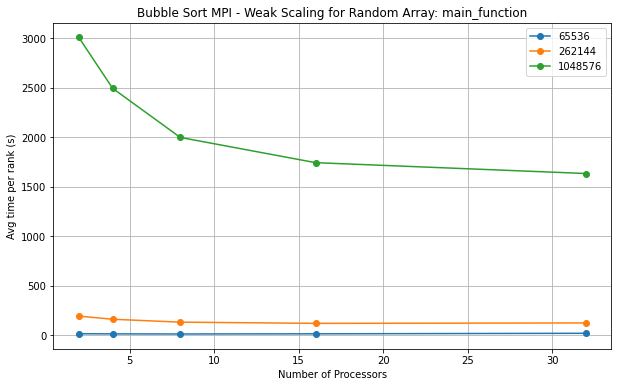

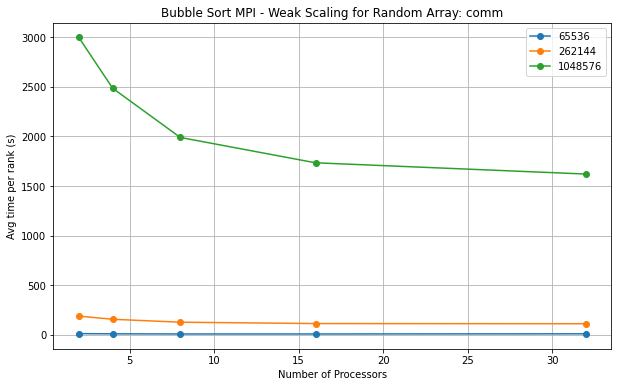

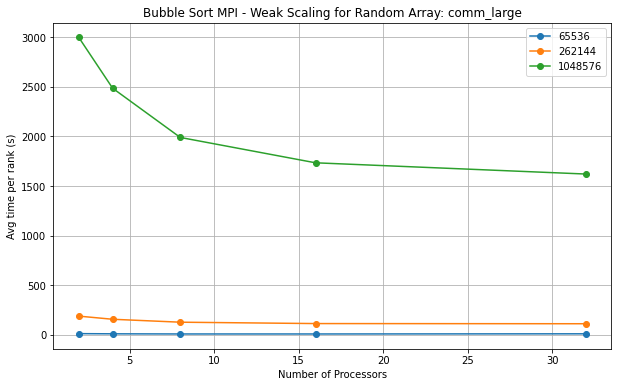

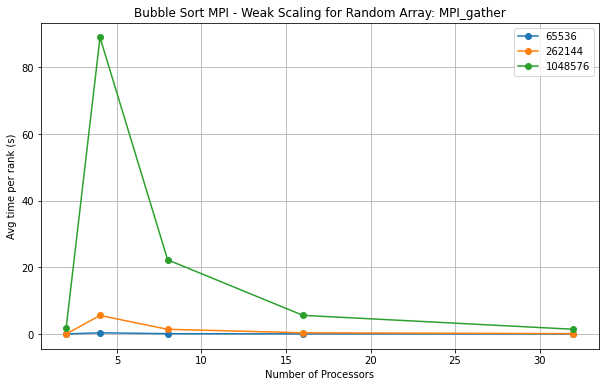

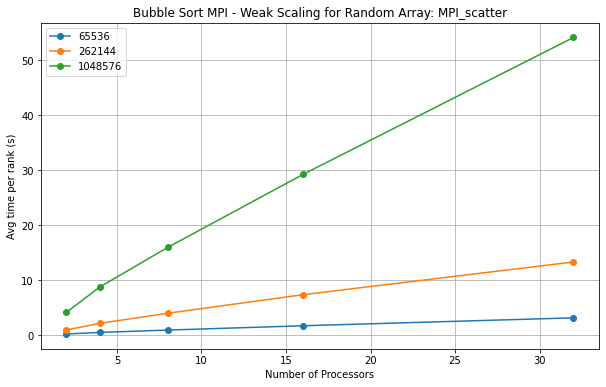

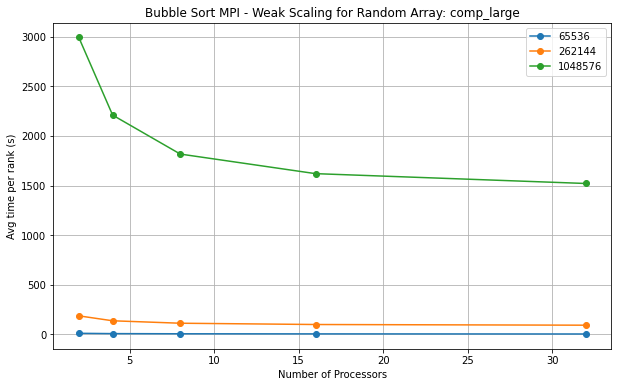

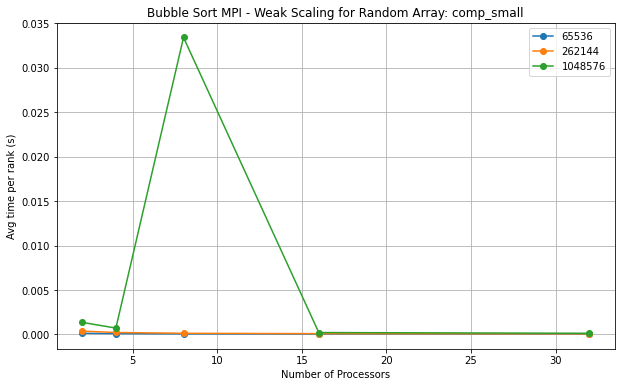

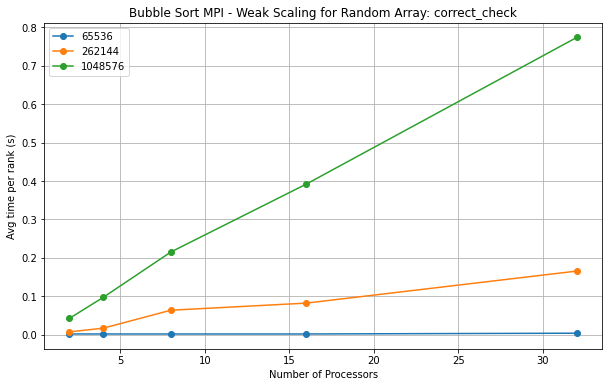

In [11]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Processors')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Bubble Sort MPI - Weak Scaling for Random Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()

# Sorted

In [15]:
tksorted = th.Thicket.from_caliperreader(glob("CALI_FILES_MPI/*-s2.cali"))
tksorted.dataframe = tksorted.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis=1)

gbsorted = tksorted.groupby("InputSize")

ctksorted = th.Thicket.concat_thickets(
    thickets=list(gbsorted.values()),
    headers=list(gbsorted.keys()),
    axis="columns",
    metadata_key="num_procs"
)

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b1813f761f0>, 262144: <thicket.thicket.Thicket object at 0x2b1813fb53d0>, 1048576: <thicket.thicket.Thicket object at 0x2b1813f76220>}


In [16]:
ctksorted.dataframe = ctksorted.dataframe.reset_index().drop(("node"), axis=1)
ctksorted.dataframe = ctksorted.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

main_function = ctksorted.dataframe.loc["main_function"]
comm = ctksorted.dataframe.loc["comm"]
comm_large = ctksorted.dataframe.loc["comm_large"]
MPI_gather = ctksorted.dataframe.loc["MPI_gather"]
MPI_scatter = ctksorted.dataframe.loc["MPI_scatter"]
comp_large = ctksorted.dataframe.loc["comp_large"]
correct_check = ctksorted.dataframe.loc["correct_check"]
data_initialization = ctksorted.dataframe.loc["data_initialization"]

<ipython-input-16-3b023a72cec9>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctksorted.dataframe = ctksorted.dataframe.reset_index().drop(("node"), axis=1)


In [17]:
regions = [main_function, comm, comm_large, MPI_gather, MPI_scatter, comp_large,correct_check, data_initialization]
names = ["main_function", "comm", "comm_large", "MPI_gather", "MPI_scatter", "comp_large", "comp_small", "correct_check", "data_initialization"]

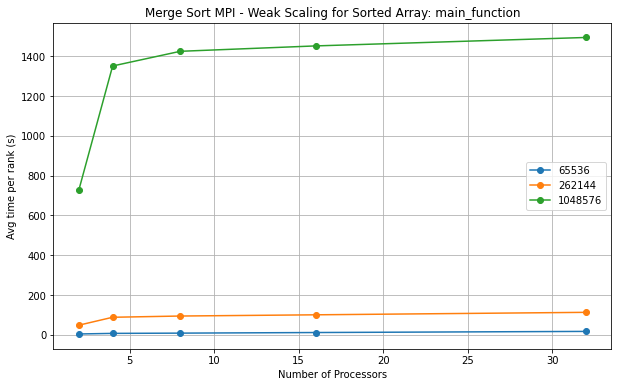

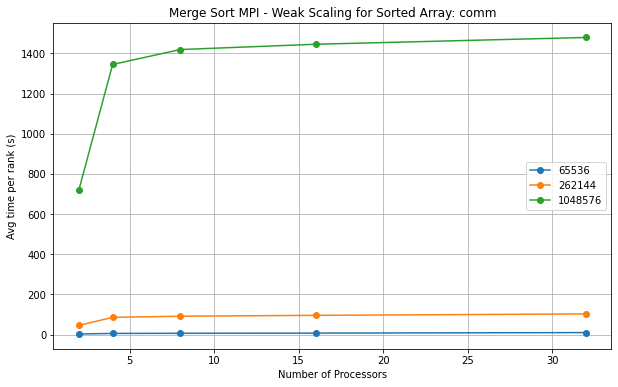

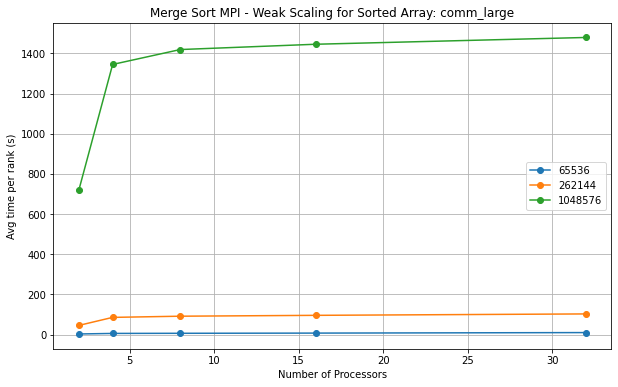

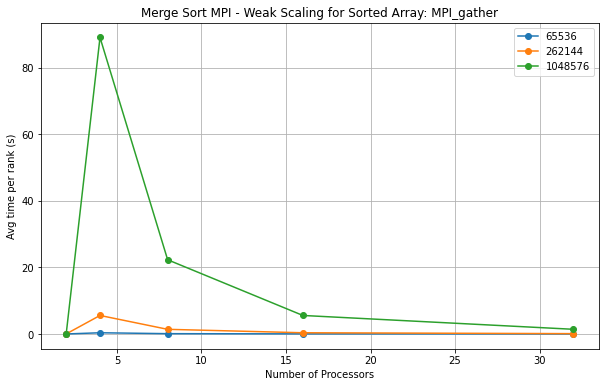

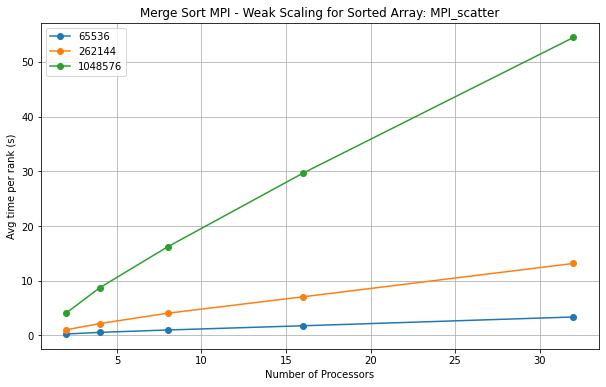

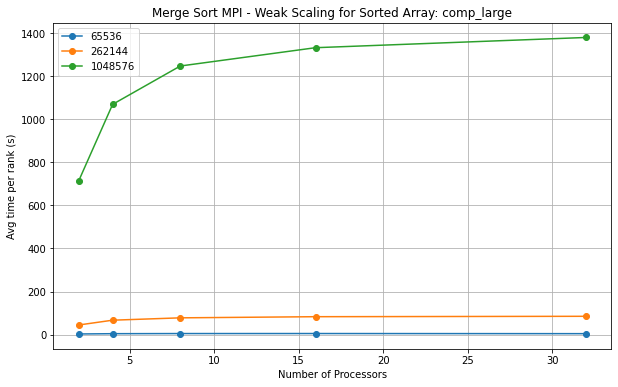

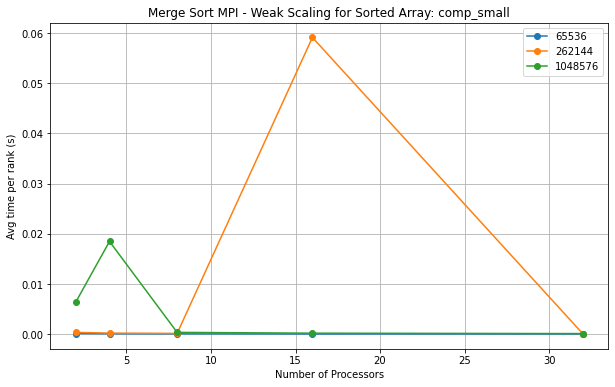

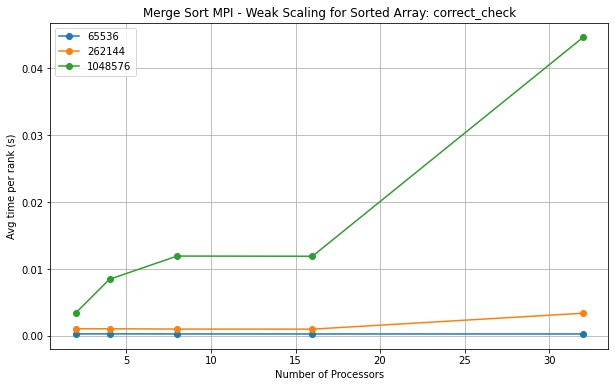

In [18]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Processors')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Merge Sort MPI - Weak Scaling for Sorted Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()


# Reverse


In [20]:
tkrev = th.Thicket.from_caliperreader(glob("CALI_FILES_MPI/*-s3.cali"))
tkrev.dataframe = tkrev.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis=1)

gbrev = tkrev.groupby("InputSize")

ctkrev = th.Thicket.concat_thickets(
    thickets=list(gbrev.values()),
    headers=list(gbrev.keys()),
    axis="columns",
    metadata_key="num_procs"
)

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b1813e08730>, 262144: <thicket.thicket.Thicket object at 0x2b18118cf4f0>, 1048576: <thicket.thicket.Thicket object at 0x2b18118951f0>}


# Check for DataFrame columns

Check for the necessary DataFrame columns from the [report](https://github.com/TAMU-CSCE435-Pearce/Project/blob/master/Report.md#4c-you-should-measure-the-following-performance-metrics). For the GPU columns, you need one or the other column in the tuple, not both.

In [21]:
ctkrev.dataframe = ctkrev.dataframe.reset_index().drop(("node"), axis=1)
ctkrev.dataframe = ctkrev.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

main_function = ctkrev.dataframe.loc["main_function"]
comm = ctkrev.dataframe.loc["comm"]
comm_large = ctkrev.dataframe.loc["comm_large"]
MPI_gather = ctkrev.dataframe.loc["MPI_gather"]
MPI_scatter = ctkrev.dataframe.loc["MPI_scatter"]
comp_large = ctkrev.dataframe.loc["comp_large"]
correct_check = ctkrev.dataframe.loc["correct_check"]
data_initialization = ctkrev.dataframe.loc["data_initialization"]

<ipython-input-21-3c58f1afe1c4>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctkrev.dataframe = ctkrev.dataframe.reset_index().drop(("node"), axis=1)


In [22]:
regions = [main_function, comm, comm_large, MPI_gather, MPI_scatter, comp_large,correct_check, data_initialization]
names = ["main_function", "comm", "comm_large", "MPI_gather", "MPI_scatter", "comp_large", "comp_small", "correct_check", "data_initialization"]

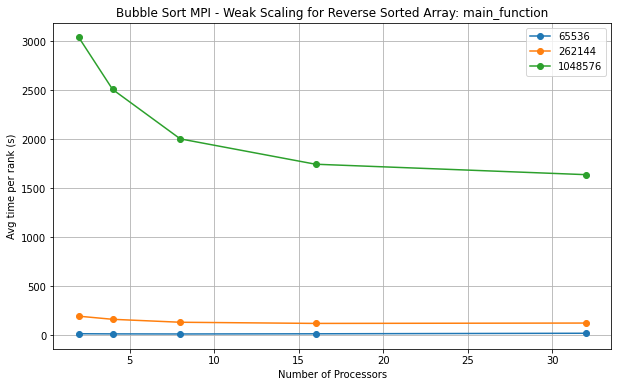

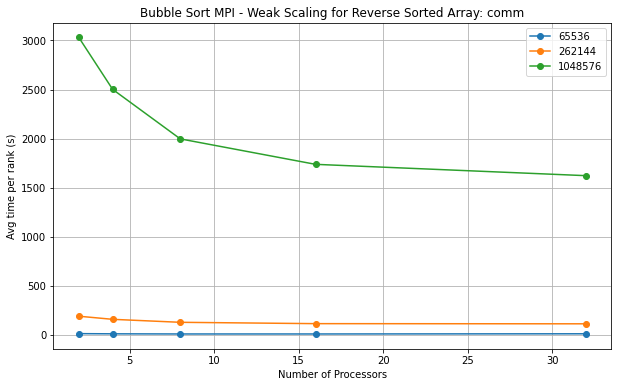

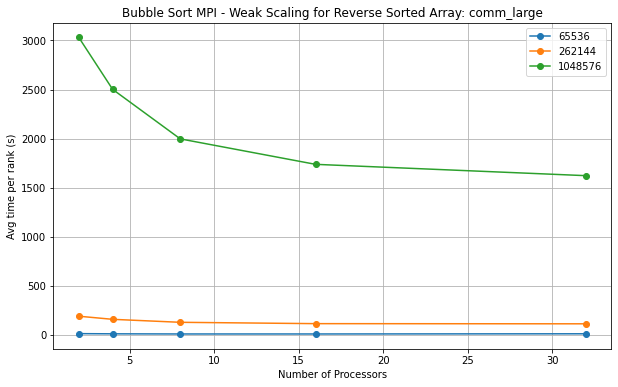

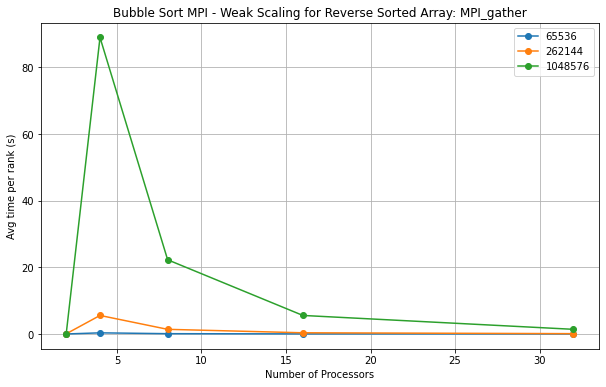

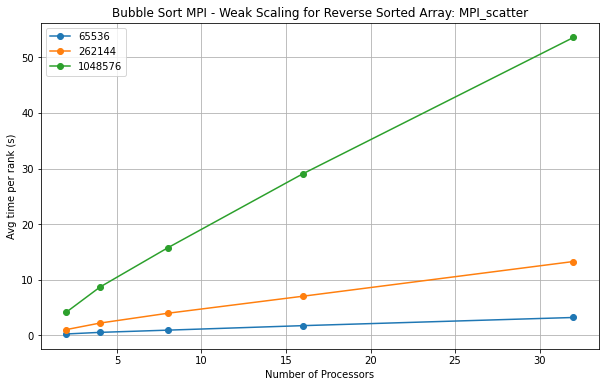

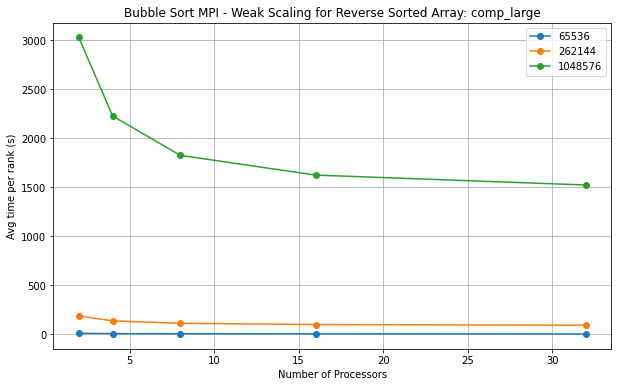

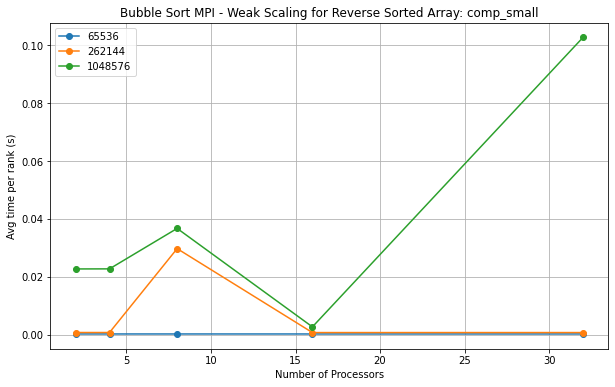

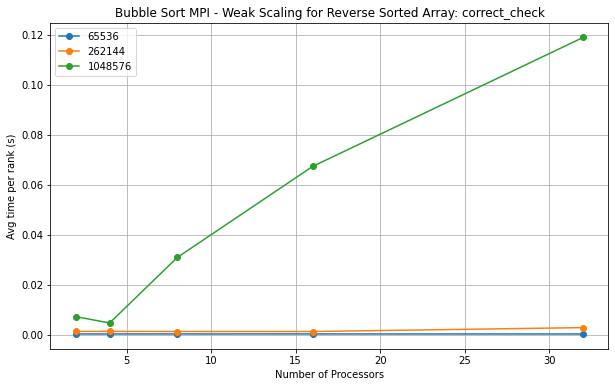

In [23]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Processors')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Bubble Sort MPI - Weak Scaling for Reverse Sorted Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()

In [25]:
tk1 = th.Thicket.from_caliperreader(glob("CALI_FILES_MPI/*-s4.cali"))
tk1.dataframe = tk1.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis=1)

gb1 = tk1.groupby("InputSize")

ctk1 = th.Thicket.concat_thickets(
    thickets=list(gb1.values()),
    headers=list(gb1.keys()),
    axis="columns",
    metadata_key="num_procs"
)

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b18118faa30>, 262144: <thicket.thicket.Thicket object at 0x2b1813e79910>, 1048576: <thicket.thicket.Thicket object at 0x2b181433aca0>}


# Try all files together

In [26]:
ctk1.dataframe = ctk1.dataframe.reset_index().drop(("node"), axis=1)
ctk1.dataframe = ctk1.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

main_function = ctk1.dataframe.loc["main_function"]
comm = ctk1.dataframe.loc["comm"]
comm_large = ctk1.dataframe.loc["comm_large"]
MPI_gather = ctk1.dataframe.loc["MPI_gather"]
MPI_scatter = ctk1.dataframe.loc["MPI_scatter"]
comp_large = ctk1.dataframe.loc["comp_large"]
correctness_check = ctk1.dataframe.loc["correct_check"]
data_initialization = ctk1.dataframe.loc["data_initialization"]

<ipython-input-26-da4037834f58>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk1.dataframe = ctk1.dataframe.reset_index().drop(("node"), axis=1)


In [27]:
regions = [main_function, comm, comm_large, MPI_gather, MPI_scatter, comp_large,correct_check, data_initialization]
names = ["main_function", "comm", "comm_large", "MPI_gather", "MPI_scatter", "comp_large", "comp_small", "correct_check", "data_initialization"]

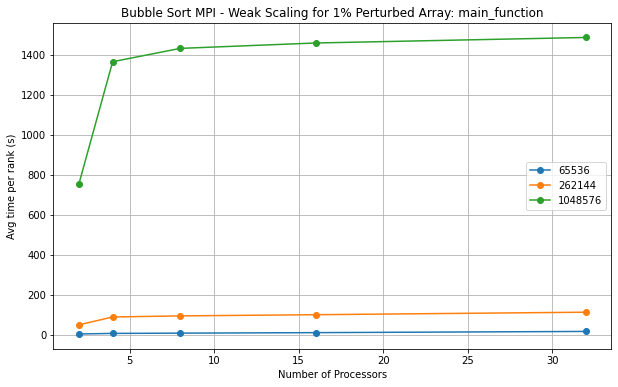

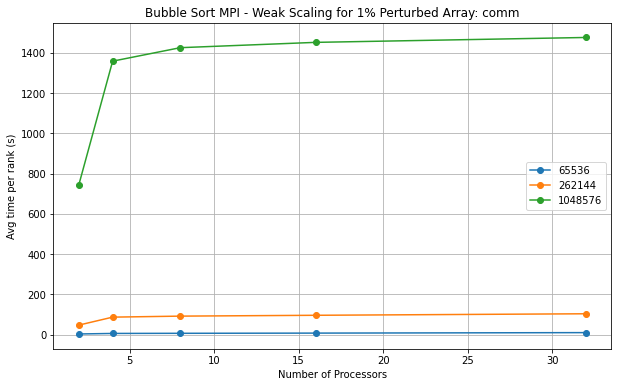

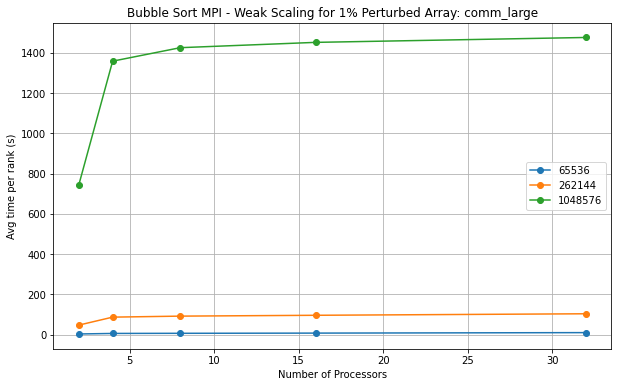

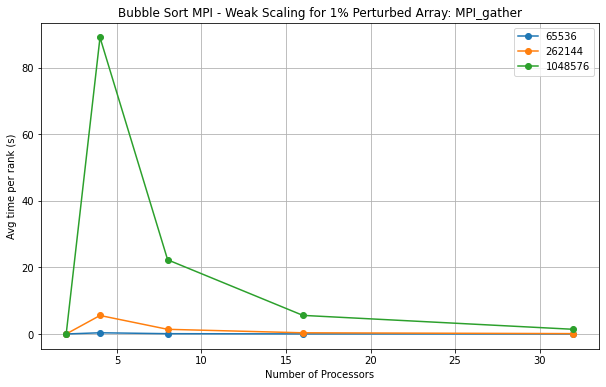

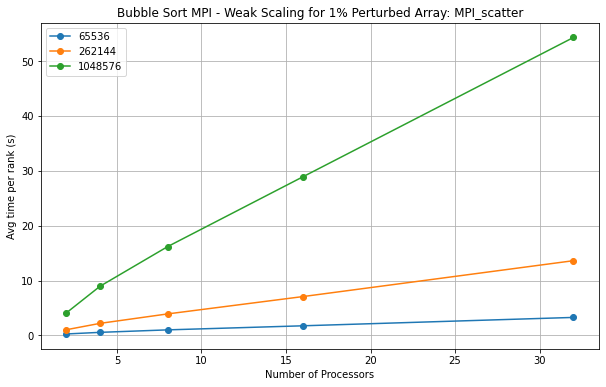

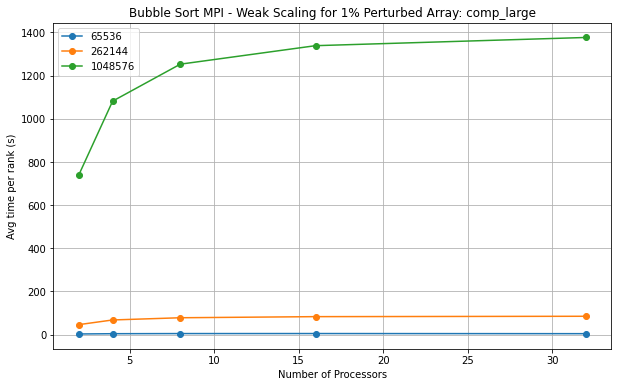

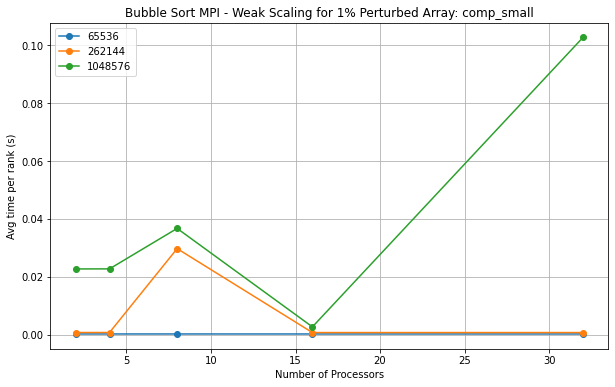

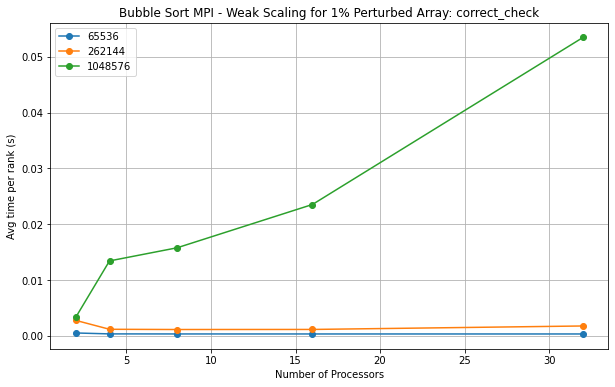

In [28]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Processors')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Bubble Sort MPI - Weak Scaling for 1% Perturbed Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()
